### **11 LAB-2 심장질환 데이터를 수집하고 학습 데이터 구성하기**

In [2]:
import pandas as pd

col_Names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
             'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']
df_heart = pd.read_csv('heart+disease//processed.cleveland.data',\
                       names=col_Names)
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
import numpy as np

df_heart.replace('?', np.nan, inplace=True)
df_heart=df_heart.dropna()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_heart, test_size=0.3, random_state=0, \
                               stratify=df_heart['label'])
train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]
test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

### **11 LAB-3 심장질환 데이터로 증상 분류하기**

(array([160.,  54.,  35.,  48.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

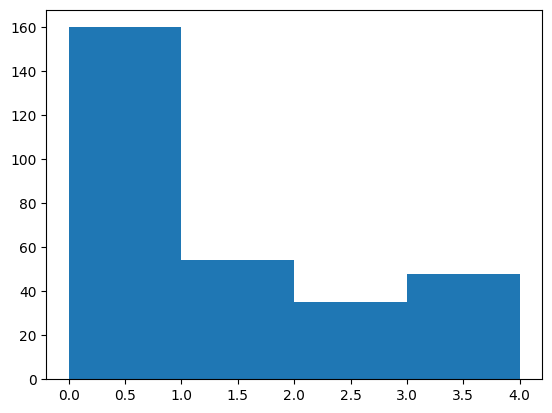

In [6]:
import matplotlib.pyplot as plt
plt.hist(df_heart.label, bins=4)

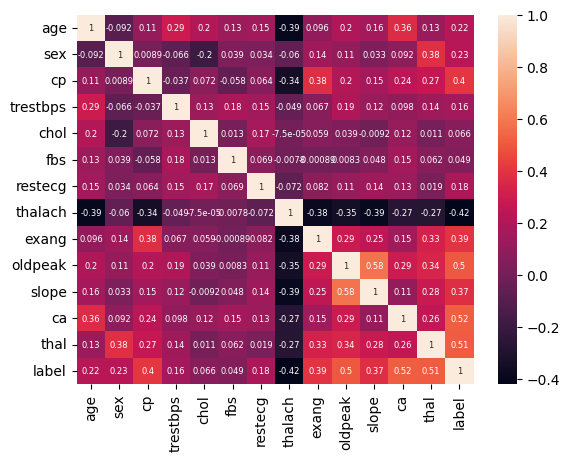

In [7]:
import seaborn as sns
ax = sns.heatmap(df_heart.corr(), annot=True, annot_kws={"size":6})
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))

랜덤 포레스트 알고리즘 예측 정확도: 0.6


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(train_Y.shape)

(207, 1)


In [11]:
train_Y

,label
115,0
89,0
209,1
236,2
72,1
...,...
52,2
61,0
92,0
17,0
